#No.1

In [1]:
#import package and module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

Pertama, kita import terlebih dahulu package dan module yang dibutuhkan untuk menjalankan beberapa program yang akan dilakukan

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Hanya sebagai tambahan, jika nanti muncul warning saat runing program bisa di sembunyikan

In [3]:
with open('about dataset.txt') as f:
    contents = f.read()
    print(contents)

About datasets
1. age - age in years 
2. sex - sex (1 = male; 0 = female) 
3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic) 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
5. chol - serum cholestoral in mg/dl 
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy) 
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping) 
12. ca - number of major vessels (0-3) colored by flourosopy 
13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect 
14. output - the predicted attribute - diagnosis of heart disease (0 = less chance of heart attack, 1 = higher chance of heart attack)



Mencoba untuk melihat text deskripsi mengenai dataset yang akan digunakan

##Observasi Data

In [4]:
#Inisiasi variable dataset
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Melihat isi dari dataset untuk lima baris pertamanya

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Melihat informasi mengenai dataset yang digunakan, terdiri 303 sampel baris dan 14 kolom yang semua datanya berjenis numerik tanpa data null

In [6]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Mencoba untuk melihat statistik deskriptif dari dataset yang digunakan, dari tabel terlihat beberapa fitur memiliki rata rata yang besar dengan standar deviasi yang cukup tinggi, hal ini menandakan bahwa rentang variasi datanya cukup lebar sehingga memungkinkan terdapat outlier di dalam dataset

##EDA

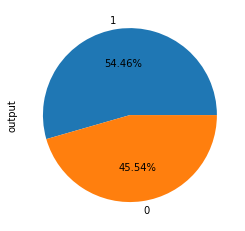

In [7]:
heart_df.output.value_counts().plot.pie(autopct=('%.2f{}'.format('%%')))

Mencoba melihat perbandingan jumlah data untuk setiap nilai pada fitur target dengan visualisasi pie chart.

In [8]:
heart_df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

Melihat secara proporsial jumlah data untuk setiap nilai pada fitur target. Untuk angka 1 sebanyak 165 data yang berarti terdapat 165 orang dengan kemungkinan tinggi terkena serangan jantung dan 0 sebanyak 138 data yang berarti terdapat 138 orang dengan kemungkinan rendah terkena serangan jantung 

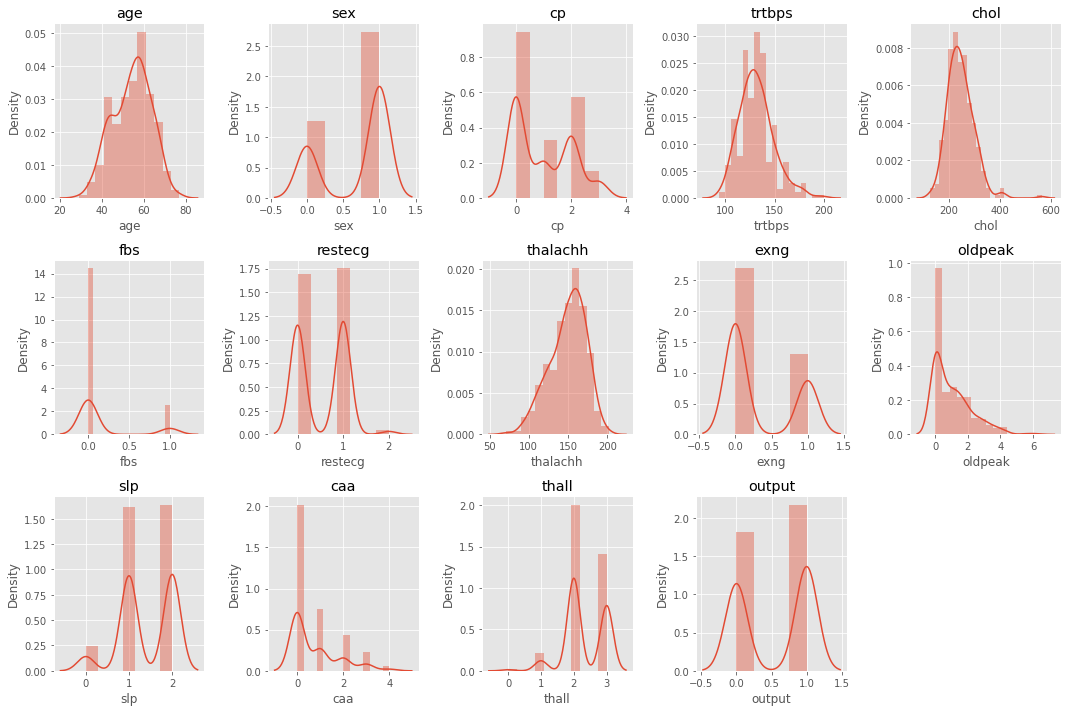

In [9]:
# Plot histogram untuk masing - masing fitur
plt.style.use("ggplot")
fig, axs = plt.subplots(3, 5, figsize=(15,10))
axs[-1,-1].axis('off')

for i, ax in zip(range(14), axs.flat):
  sns.distplot(heart_df[heart_df.columns[i]], kde=True, ax=ax)
  ax.set_title(heart_df.columns[i])

plt.tight_layout()
plt.show()

Dari subplot histogram tiap fitur yang ditampilkan, terdapat beberapa fitur yang grafiknya cenderung miring, yaitu age, trtbps, chol, thalachh, dan oldpeak. Hal ini menandakan terdapat outlier pada fitur fitur tersebut. Oleh karena itu, selanjutkan akan dicoba untuk menangani outlier tersebut.

##Handle Data Outlier

In [10]:
# menghitung IQR untuk menghitung batas outlier
lower_boundries = []
upper_boundries = []
for i in ["age", "trtbps", "chol", "thalachh", "oldpeak"]:
  IQR = heart_df[i].quantile(0.75) - heart_df[i].quantile(0.25)
  lower_bound = heart_df[i].quantile(0.25) - (1.5*IQR)
  upper_bound = heart_df[i].quantile(0.75) + (1.5*IQR)
  
  print(i, ":", lower_bound, ",",  upper_bound)
  
  lower_boundries.append(lower_bound)
  upper_boundries.append(upper_bound)

age : 27.25 , 81.25
trtbps : 90.0 , 170.0
chol : 115.75 , 369.75
thalachh : 84.75 , 214.75
oldpeak : -2.4000000000000004 , 4.0


Disini, dihitung IQR(Interquartile Range), yaitu kuartil atas dikurang kuartil bawah. Kemudian, akan digunakan untuk menghitung batas bawah dan batas atas dari tiap fitur yang diperkirakan memiliki outlier. Dengan batas bawahnya didapat dengan cara menghitung kuartil bawah fitur dikurang 1.5*IQR dan batas atasnya didapat dengan cara menghitung kuartil atas fitur dikurang 1.5*IQR. Maka, didapat untuk fitur: \
age (batas bawah = 27.25, batas atas = 81.25) \
trtbps (batas bawah = 90, batas atas = 170) \
chol (batas bawah = 115.75, batas atas = 369.75) \
thalachh (batas bawah = 84.75, batas atas = 214.75) \
oldpeak (batas bawah = -2.4, batas atas = 4)





In [11]:
# mengganti nilai outlier dengan nilai batas atas fiturnya
j = 0
for i in ["age", "trtbps", "chol", "thalachh", "oldpeak"]:
  heart_df.loc[heart_df[i] > upper_boundries[j], i] = int(upper_boundries[j])
  j = j + 1  

untuk setiap nilai pada fitur yang terindikasi terdapat outlier, jika nilainya lebih besar dari batas atas fitur tersebut, maka dapat dikatakan bahwa nilai tersebut adalah outlier sehingga dengan program di atas, nilai outlier pada fitur tersebut akan digantikan dengan batas atas fiturnya

In [12]:
# mengganti nilai outlier dengan nilai batas atas fiturnya
j = 0
for i in ["age", "trtbps", "chol", "thalachh", "oldpeak"]:
  heart_df.loc[heart_df[i] < lower_boundries[j], i] = int(lower_boundries[j])
  j = j + 1  

untuk setiap nilai pada fitur yang terindikasi terdapat outlier, jika nilainya lebih kecil dari batas bawah fitur tersebut, maka dapat dikatakan bahwa nilai tersebut adalah outlier sehingga dengan program di atas, nilai outlier pada fitur tersebut akan digantikan dengan batas bawah fiturnya

In [13]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.280528,245.122112,0.148515,0.528053,149.689769,0.326733,1.024422,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,16.582241,47.520455,0.356198,0.525860,22.769129,0.469794,1.110127,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,369.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


Mencoba untuk melihat kembali statistik deskriptif dataset tersebut setelah outliernya sudah digantinkan dengan data baru, terlihat bahwa untuk rata-rata beberapa fitur yang terdapat outlier sebelumnya, sekarang sudah mengalami penurunan dan untuk standar deviasinya juga mengalami penurunan yang menandakan rentang variasi datanya sudah tidak terlalu lebar.

##OneHotEncoding Manual

In [14]:
cat_var = ['cp','fbs','restecg','exng','slp','caa','thall']
data_cat = heart_df[cat_var].copy()
data_cat = pd.get_dummies(data_cat,columns=cat_var)
heart_df = pd.concat([heart_df, data_cat],axis=1)
heart_df.drop(columns=cat_var,inplace=True)

Disini dilakukan OneHotEncoding untuk data kategorik yang sudah dijadikan numerik, tetapi secara manual, yaitu dengan cara menambahkan data dummy baru yang disesuaikan dengan fitur kolom yang ada pada dataset yang dimana memetakan nilai pada fitur dengan angka 1 jika iya dan 0 jika bukan. Sebagai cth dapat dilihat pada tabel dibawah, fitur cp terdiri dari 4 nilai kategorik yg sudah jadi numerik, jika kita tambahkan data dummy, maka akan terdapat 4 kolom baru yang memetakan nilai dari cp. Untuk baris pertama, karena cp bernilai 3 maka akan dipetakan untuk 4 kolom tadi bahwa cp_0:0, cp_1:0, cp_2:0, cp_3:1. Setelah semua nilai pada fitur data kategorik sudah dipetakan pada data dummy, maka kolom aslinya bisa di drop atau dihilangkan, karena sudah direpresentasikan oleh data dummy tersebut.

In [15]:
heart_df.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0


Melihat dataset yang sudah dilakukan OneHotEncoding secara manual, cara lain bisa menggunakan module OneHotEncoding dari package sklearn.preprocessing

##Selection Features

In [16]:
# feature variables
X = heart_df.drop('output', axis=1)

# target variable
y = heart_df['output'].copy()

Akan dislicing fitur-fitur yang menjadi fitur target dan fitur pendukung.

##Scaling Dataset

In [17]:
#Scaling dataset
std_scale = StandardScaler()
X.iloc[:,:] = std_scale.fit_transform(X)
X

,age,sex,trtbps,chol,thalachh,oldpeak,cp_0,cp_1,cp_2,cp_3,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.681005,0.828728,-0.255515,0.013648,1.150938,-0.945384,-0.444554,-0.634648,3.489114,...,-0.939142,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,3.979112,-1.100763,-0.793116
1,-1.915313,0.681005,-0.077351,0.102818,1.641343,2.233684,-0.945384,-0.444554,1.575677,-0.286606,...,-0.939142,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,0.908461,-0.793116
2,-1.474158,-1.468418,-0.077351,-0.866788,0.981467,0.338879,-0.945384,2.249444,-0.634648,-0.286606,...,1.064802,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,0.908461,-0.793116
3,0.180175,0.681005,-0.681403,-0.192279,1.245417,-0.202494,-0.945384,2.249444,-0.634648,-0.286606,...,1.064802,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,0.908461,-0.793116
4,0.290464,-1.468418,-0.681403,2.294970,0.585541,-0.382951,1.057772,-0.444554,-0.634648,-0.286606,...,1.064802,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,0.908461,-0.793116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,0.526702,-0.086887,-1.174130,-0.743867,1.057772,-0.444554,-0.634648,-0.286606,...,-0.939142,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,-1.100763,1.260850
299,-1.033002,0.681005,-1.285455,0.397915,-0.778204,0.158422,-0.945384,-0.444554,-0.634648,3.489114,...,-0.939142,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,-1.100763,1.260850
300,1.503641,0.681005,0.768323,-1.098650,-0.382278,2.143455,1.057772,-0.444554,-0.634648,-0.286606,...,-0.939142,-1.169268,-0.522599,2.640773,-0.265841,-0.129532,-0.081514,-0.251312,-1.100763,1.260850
301,0.290464,0.681005,-0.077351,-2.405509,-1.526064,0.158422,1.057772,-0.444554,-0.634648,-0.286606,...,-0.939142,-1.169268,1.913515,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,-1.100763,1.260850


Karena skala perbandingan nilai pada setiap data di beberapa fitur, maka akan dilakukan standarisasi supaya skala perbandingannya tidak terlalu besar. Sehingga berdampak bagus juga untuk membangun model nanti. 

##Train Test Split Dataset

In [18]:
#Split Dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((242, 29), (61, 29), (242,), (61,))

Akan displit atau dibagi dataset yang akan digunakan sebagai data latih dan data test dengan perbandingan 0.2, yaitu 80% dari total dataset dijadikan sebagai data latih dan 20% sebagai data test

In [19]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_train.shape, Y_val.shape

((242, 2), (61, 2))

Disini mencoba untuk menjadikan data target menjadi 2 kolom dari yang sebelumnya hanya satu kolom.

##Build Model

In [49]:
#Membaut model deep learning dengan keras dari tensorflow
def build_model(hp):
  model=keras.models.Sequential()
  model.add(Dense(29, input_dim=29, activation="relu"))

  hp_layers=hp.Choice('layer',[2,3])
  hp_neurons=hp.Int('neuron', min_value=30,max_value=150,step=10)

  for layers in range(hp_layers):
    model.add(Dense(hp_neurons, activation="relu"))
  model.add(Dense(2,activation="sigmoid"))

  optimizer=tf.keras.optimizers.Adam()
  model.compile(loss= 'binary_crossentropy',
              optimizer=optimizer,
              metrics=['binary_accuracy'])
  
  return model

Membuat arsitektur model deep neural network dengan module keras dari package tensorflow, untuk hyperparameternya disetting secara manual dan random dengan intuisi karena dituning kembali hyperparameternya, yaitu untuk fungsi aktivasi pada hidden layer adalah 'relu' dan pada output layer adalah 'sigmoid'. Kemudian, untuk jumlah neuron pada input layer 29 (menyesuaikan jumlah fitur) dan jumlah neuron pada hidden layer di set minimal 30 dan maksimal 150 dengan stepsize kenaikan 10, hidden layer bisa 2 atau 3 tergantung saat di tuning. Untuk loss function digunakan binary cross entropy dengan optimisasi Adam dan metrics binary accuracy.

In [21]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 9.2 MB/s 


install package keras_tuner karena belum ada di library colab

In [22]:
import keras_tuner as kt

import package keras_tuner yang sudah diinstall sebelumnya karena akan digunakan untuk tuning hyperparameter

##Hyperparameter tuning

In [74]:
from keras.layers import Dense
tuner = kt.RandomSearch(
    build_model,
    objective='val_binary_accuracy',
    max_trials=5,
    overwrite=True,
    directory="test_search",
    project_name="test_project")
tuner.search(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))

Trial 5 Complete [00h 00m 07s]
val_binary_accuracy: 0.8934426307678223

Best val_binary_accuracy So Far: 0.9098360538482666
Total elapsed time: 00h 00m 48s
INFO:tensorflow:Oracle triggered exit


tuning hyperparameter dengan keras_tuner dengan metode Random Search pada model didapat val_binary_accuracy  sekitar 0.89 dan terbaik sekitar 0.91 untuk 5 kali percobaan.

In [75]:
best_hps=tuner.get_best_hyperparameters()[0]

print('best number of layers:',best_hps.get('layer'))
print('best number of neurons:',best_hps.get('neuron'))

best number of layers: 3
best number of neurons: 40


Dari tuner keras juga didapat hyperparameter terbaik untuk hidden layer, yaitu 3 hidden layer dan jumlah neuron, yaitu 40 neuron.

##Final Model

In [76]:
model = tuner.hypermodel.build(best_hps)

Kemudian, set hyperparameter terbaik yang sudah didapatkan dari hasil tuning ke dalam model.

In [77]:
model.fit(X_train, Y_train, epochs = 100, batch_size = 10,validation_split= 0.2)

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 0.6368 - binary_accuracy: 0.7176 - val_loss: 0.5894 - val_binary_accuracy: 0.6735
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5086 - binary_accuracy: 0.8368 - val_loss: 0.4740 - val_binary_accuracy: 0.7551
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3879 - binary_accuracy: 0.8601 - val_loss: 0.4043 - val_binary_accuracy: 0.7653
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3211 - binary_accuracy: 0.8834 - val_loss: 0.4039 - val_binary_accuracy: 0.7959
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2853 - binary_accuracy: 0.8860 - val_loss: 0.4249 - val_binary_accuracy: 0.7755
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2521 - binary_accuracy: 0.8990 - val_loss: 0.4244 - val_binary_accuracy: 0.7959
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - lo

Selanjutnya fitting lagi atau latih lagi model dengan data latih dengan epochs sebanyak 100, batch sizenya 10, dan validasi dengan data test.

In [78]:
y_prob = model.predict(X_val)
y_prob

array([[1.00000000e+00, 3.61866891e-11],
       [1.35230720e-02, 9.87840772e-01],
       [2.57066858e-06, 9.99995232e-01],
       [1.00000000e+00, 2.11085309e-17],
       [5.47464260e-05, 9.99914050e-01],
       [2.18714904e-05, 9.99967635e-01],
       [3.19010105e-05, 9.99958456e-01],
       [1.00000000e+00, 6.39581397e-16],
       [1.00000000e+00, 1.61542492e-13],
       [9.99998689e-01, 1.64544747e-06],
       [4.74318877e-05, 9.99946058e-01],
       [4.42838669e-02, 9.58972812e-01],
       [3.67581844e-04, 9.99591172e-01],
       [9.99990642e-01, 9.19437207e-06],
       [1.56853353e-09, 1.00000000e+00],
       [6.31193245e-07, 9.99998450e-01],
       [1.08113215e-11, 1.00000000e+00],
       [1.00000000e+00, 3.53308810e-12],
       [1.00000000e+00, 1.22895444e-18],
       [1.00000000e+00, 1.20418616e-12],
       [5.78684885e-05, 9.99939919e-01],
       [6.97672844e-01, 2.76560962e-01],
       [8.80396008e-01, 9.42772031e-02],
       [6.53051393e-06, 9.99989152e-01],
       [7.057358

Mencoba untuk memprediksi data test, didapatkan probabilitas untuk setiap nilai pada setiap baris di 2 kolom karena sebelumnya sudah kita ubah data targetnya menjadi 2 kolom juga.

In [79]:
y_pred=np.array([np.argmax(i) for i in y_prob])

Untuk setiap baris dari 2 kolom tersebut nilai yang paling tinggi diambil lalu dijadikan array 1 dimensi.

##Evaluasi Model

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluation_parametrics(name,Y_val, y_pred):
    
    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(Y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\nClassification Report for Data Test\n")
    print(classification_report(Y_val, y_pred))   
    print("--------------------------------------------------------------------------")

    t1.plot()

Akan ditampilkan classification report dan confusion matrix untuk model ini.


------------------------Deep Neural Network------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

--------------------------------------------------------------------------


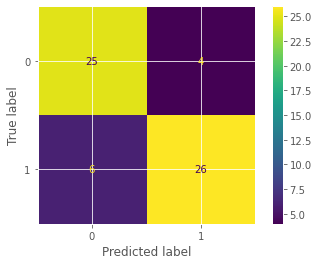

In [81]:
evaluation_parametrics("Deep Neural Network", y_val, y_pred)

Berdasarkan classification report dan confusion matrix di atas: \
1. Nilai untuk precision pada data 0 adalah 0.81 karena TN nya 25 dan FN nya 6, nilai yang cukuk bagus karena dari 29 data prediksi 25 nya data actual bernilai 0. \
2. Nilai untuk precision pada data 1 adalah 0.87 karena TP nya 26 dan FP nya 4, nilai yang bagus karena dari 32 data prediksi 26 nya data actual bernilai 1. \
3. Nilai untuk recall pada data 0 adalah 0.86 karena TN nya 25 dan FN nya 4, nilai yang bagus karena dari 29 data prediksi 25 nya data actual bernilai 0. \
4. Nilai untuk recall pada data 1 adalah 0.81 karena TP nya 26 dan FN nya 6, nilai yang cukup bagus karena dari 32 data prediksi 26 nya data actual bernilai 1. \
5. f1 score untuk data 0 adalah 0.83 karena kombinasi dari nilai precision dan recall-nya, sudah cukup bagus karena sudah di atas 0.80. \
6. f1 score untuk data 1 adalah 0.84 karena kombinasi dari nilai precision dan recall-nya, sudah cukup bagus juga karena sudah di atas 0.80. \
7. Terakhir, untuk accuracy juga sudah cukup bagus karena di atas 0.80, yaitu 0.84. \

Note: TN(True Negative), TP(True Positive), FN(False Negatif), FP(False Positif). \
Sehingga dapat disimpulkan bahwa model ini cukup bagus untuk melakukan klasifikasi biner terhadap kemungkinan tinggi atau rendah terkena serangan jantung.

#No.2

In [82]:
#Import package and module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

Pertama, import package dan module yang dibutuhkan.

In [83]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Hanya sebagai tambahan, jika nanti muncul warning saat runing program bisa di sembunyikan

In [84]:
with open('readme.txt') as f:
    contents = f.read()
    print(contents)

About this file
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,b

Melihat teks deskripsi mengenai dataset yang akan digunakan.

##Observasi Data

In [86]:
#Inisiasi variabel data frame
jamur_df = pd.read_csv('Jamur.csv')
jamur_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Mencoba melihat isi dari dataset untuk lima baris pertamanya.

In [87]:
jamur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Melihat informasi mengenai dataset,terdapat 8124 sampel baris dan 23 kolom dengan kesemua datanya non-null atau tidak ada data null, semua datanya berjenis data kategorik.

In [88]:
jamur_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Melihat statistik deskriptif dari dataset, karena data pada dataset berjenis kategorik sehingga hanya terdapat jumlah data unik untuk setiap fitur, jumlah data pada setiap fitur, dan jumlah data untuk nilai yang paling banyak di setiap fitur.

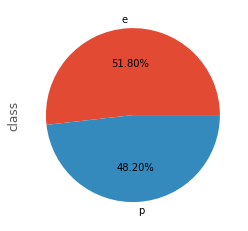

In [89]:
jamur_df['class'].value_counts().plot.pie(autopct=('%.2f{}'.format('%%')))

Melihat perbandingan jumlah data untuk setiap nilai pada fitur target dengan visualisai pie chart, untuk huruf e yang berarti jamur tidak beracun memiliki jumlah data sebesar 51.80% dari total keseluruhan data pada fitur target dan sisanya huruf p yang berarti jamur beracun memiliki jumlah data sebesar 48.20%.

In [90]:
jamur_df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Terlihat untuk jamur tidak beracun memiliki jumlah data sebanyak 4208 dan jamur beracun memiliki jumlah data sebanyak 3916. Selisih dari kedua data tersebut tidak terlalu besar sehingga dapat dikatakan seimbang untuk digunakan nanti.

##Encoding Data Kategorik

In [91]:
oe = OrdinalEncoder()
cat_var = jamur_df.select_dtypes(include= ["object"]).columns
jamur_df[cat_var] = pd.DataFrame(oe.fit_transform(jamur_df[cat_var]))

Akan di encoding atau diubah datanya dari yang kategorik menjadi numerik dengan bantuan module dari sklearn.

In [92]:
oe.categories_

[array(['e', 'p'], dtype=object),
 array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object),
 array(['f', 'g', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object),
 array(['a', 'f'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['b', 'n'], dtype=object),
 array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'],
       dtype=object),
 array(['e', 't'], dtype=object),
 array(['?', 'b', 'c', 'e', 'r'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object),
 array(['p'], dtype=object),
 array(['n', 'o', 'w', 'y'], dtype=object),
 array(['n', 'o', 't'], dtype=object),
 array(['e', 'f', 'l', 'n', 'p'], dtype=object),
 array(['b', 'h', 'k', 'n', 

Berikut adalah array dari setiap fitur, terlihat bahwa untuk array pertama, yaitu fitur class terdapat 2 entri nilai, yaitu e dan p. Karena e berada di indeks ke-0 dan p indeks ke-1. Maka, setelah diencoding nanti datanya akan berubah, untuk setiap nilai berhuruf e pada fitur class akan berganti jadi angka 0 dan huruf p menjadi 1. Begitu juga dengan semua fitur, menggunakan prinsip yang sama semua nilai huruf/kategorik akan berganti menjadi nilai angka/numerik berdasarkan indeks nya pada array di atas. 

In [93]:
jamur_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0


Tampilan dataset terbaru setelah dilakukan encoding data kategorik, semua data sudah berubah menjadi numerik.

##Selection Feature

In [94]:
#feature variabels
X = jamur_df.iloc[:,1:]

#target variable
y = jamur_df.iloc[:,0]

Data dislicing untuk menentukan mana yang sebagai fitur target dan fitur pendukung.

In [95]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0


In [96]:
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: class, dtype: float64

##Scaling Dataset

In [97]:
std_scale = StandardScaler()
X.iloc[:,:] = std_scale.fit_transform(X)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


Pada tabel data frame setelah dilakukan encoding data kategorik, terliha bahwa untuk setiap nilai pada setiap fitur memiliki skala perbandingan yang cukup besar atau tidak sama. Oleh karena itu, sekarang dilakukan standarisasi skala perbandingan untuk setiap nilai pada setiap fitur, supaya model yang dibuat nanti semakin optimal.

##Train Test Split Dataset

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6499, 22), (1625, 22), (6499,), (1625,))

Dataset dibagi menjadi 80% data latih dan 20% data test, sehingga didapat untuk X train sebesar 6499 sampel baris dan 22 kolom, X test sebesar 1625 sampel baris dan 22 kolom, y train sebesar 6499 sampel baris dan 1 kolom, y test sebesar 1625 sampel baris dan 1 kolom. \
untuk variabel X adalah kumpulan dataset yang berisi fitur fitur pendukung. \
untuk variabel y adalah fitur targetnya. 

##Build Model

In [99]:
def build_model(n_neurons=(25,25), learning_rate=3e-3, activation_hidden='relu'):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=[22]))
  for i in range(len(n_neurons)):
    model.add(keras.layers.Dense(n_neurons[i], activation=activation_hidden))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=optimizer,
                metrics='accuracy')
  return model

Dibuat model deep neural network dengan hyperparameternya diset menggunakan intuisi, yaitu 2 hidden layer dengan 25 neuron untuk hidden layer pertama dan 25 neuron untuk hidden layer kedua (karena input nya ada 22). Menggunakan learning rate sebesar 0.003, fungsi aktivasi pada hidden layer adalah 'relu' dan pada output layer adalah 'sigmoid'. Dengan optimisasi Adam dari keras, loss functionya binary crossentropy, dan metricsnya accuracy.

In [100]:
model = KerasClassifier(build_model, epochs=100, batch_size=200)

Menggunakan klasifikasi untuk pemodelan dari keras dengan epochs 100 dan batch size 200.

In [101]:
cv_mean_accuracy = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.5071 - accuracy: 0.7830
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9167
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9633
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9825
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9892
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9945
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9979
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9991
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9998
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9998
Epoch 11/

In [102]:
cv_mean_accuracy

1.0

Menggunakan cross validation score untuk melihat rata rata akurasi cross validasinya,dengan cv 3 folds dan scoringnya accuracy.

##Hyperparameter tuning dengan RandomizedSearchCV

In [103]:
params_grid1 = {'n_neurons':[(25,25), (30,25), (50,30),(70,50),(100,70),(130,100)]}

grid_search1 = RandomizedSearchCV(model, params_grid1, cv=3, scoring='accuracy', 
                           verbose=2)
grid_search1.fit(X_train, y_train, verbose=0)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .................................n_neurons=(25, 25); total time=   3.9s
[CV] END .................................n_neurons=(25, 25); total time=   5.9s
[CV] END .................................n_neurons=(25, 25); total time=   4.0s
[CV] END .................................n_neurons=(30, 25); total time=   4.0s
[CV] END .................................n_neurons=(30, 25); total time=   5.8s
[CV] END .................................n_neurons=(30, 25); total time=   5.9s
[CV] END .................................n_neurons=(50, 30); total time=   4.0s
[CV] END .................................n_neurons=(50, 30); total time=   6.5s
[CV] END .................................n_neurons=(50, 30); total time=   5.9s
[CV] END .................................n_neurons=(70, 50); total time=   4.4s
[CV] END .................................n_neurons=(70, 50); total time=   6.0s
[CV] END .................................n_neuro

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7faf893a3950>,
                   param_distributions={'n_neurons': [(25, 25), (30, 25),
                                                      (50, 30), (70, 50),
                                                      (100, 70), (130, 100)]},
                   scoring='accuracy', verbose=2)

Mencari hyperparameter terbaik untuk neuron di hidden layer dengan 6 pilihan.

In [104]:
grid_search1.cv_results_['mean_test_score'].max(), grid_search1.best_params_

(1.0, {'n_neurons': (25, 25)})

Di dapat jumlah neuron terbaik yang memberikan score terbaik, yaitu 25 neuron untuk hidden layer pertama dan 25 neuron untuk hidden layer kedua.

In [105]:
params_grid2 = {'n_neurons':[(25,25)],
              'learning_rate':[3e-4, 3e-3, 3e-2],
              'activation_hidden':['relu','sigmoid','tanh']}

grid_search2 = RandomizedSearchCV(model, params_grid2, cv=3, scoring='accuracy', 
                           verbose=2)
grid_search2.fit(X_train, y_train, verbose=0)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END activation_hidden=relu, learning_rate=0.0003, n_neurons=(25, 25); total time=   5.9s
[CV] END activation_hidden=relu, learning_rate=0.0003, n_neurons=(25, 25); total time=   3.9s
[CV] END activation_hidden=relu, learning_rate=0.0003, n_neurons=(25, 25); total time=   5.8s
[CV] END activation_hidden=relu, learning_rate=0.003, n_neurons=(25, 25); total time=   5.9s
[CV] END activation_hidden=relu, learning_rate=0.003, n_neurons=(25, 25); total time=   4.4s
[CV] END activation_hidden=relu, learning_rate=0.003, n_neurons=(25, 25); total time=   5.8s
[CV] END activation_hidden=relu, learning_rate=0.03, n_neurons=(25, 25); total time=   4.0s
[CV] END activation_hidden=relu, learning_rate=0.03, n_neurons=(25, 25); total time=   6.0s
[CV] END activation_hidden=relu, learning_rate=0.03, n_neurons=(25, 25); total time=  11.4s
[CV] END activation_hidden=sigmoid, learning_rate=0.0003, n_neurons=(25, 25); total time=   4.0s
[CV] E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7faf893a3950>,
                   param_distributions={'activation_hidden': ['relu', 'sigmoid',
                                                              'tanh'],
                                        'learning_rate': [0.0003, 0.003, 0.03],
                                        'n_neurons': [(25, 25)]},
                   scoring='accuracy', verbose=2)

Mencari hyperparameter terbaik untuk learning rate dan juga fungsi aktivasinya. Untuk learning rate nya terdapat 3 pilihan, yaitu 0.0003, 0.003, dan 0.03. Untuk fungsi aktivasinya juga terdapat 3 pilihan, yaitu relu, sigmoid, dan tanh.

In [106]:
grid_search2.cv_results_['mean_test_score'].max(), grid_search2.best_params_

(1.0,
 {'activation_hidden': 'relu', 'learning_rate': 0.003, 'n_neurons': (25, 25)})

Didapat hyperparameter terbaik untuk fungsi aktivasi adalah relu, learning ratenya sebesar 0.003, dan jumlah neuron untuk masing masing hidden layer, yaitu 25 25.

In [107]:
params_grid3 = {'n_neurons':[(25,25)],
              'learning_rate':[3e-3],
              'activation_hidden':['relu'],
              'epochs':[100, 200],
              'batch_size':[100,200,350,500]}

grid_search3 = RandomizedSearchCV(model, params_grid3, cv=3, scoring='accuracy', 
                           verbose=2)
grid_search3.fit(X_train, y_train, verbose=0)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END activation_hidden=relu, batch_size=100, epochs=100, learning_rate=0.003, n_neurons=(25, 25); total time=   6.8s
[CV] END activation_hidden=relu, batch_size=100, epochs=100, learning_rate=0.003, n_neurons=(25, 25); total time=  11.0s
[CV] END activation_hidden=relu, batch_size=100, epochs=100, learning_rate=0.003, n_neurons=(25, 25); total time=  11.0s
[CV] END activation_hidden=relu, batch_size=100, epochs=200, learning_rate=0.003, n_neurons=(25, 25); total time=  21.3s
[CV] END activation_hidden=relu, batch_size=100, epochs=200, learning_rate=0.003, n_neurons=(25, 25); total time=  12.6s
[CV] END activation_hidden=relu, batch_size=100, epochs=200, learning_rate=0.003, n_neurons=(25, 25); total time=  21.2s
[CV] END activation_hidden=relu, batch_size=200, epochs=100, learning_rate=0.003, n_neurons=(25, 25); total time=   5.9s
[CV] END activation_hidden=relu, batch_size=200, epochs=100, learning_rate=0.003, n_neurons=(

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7faf893a3950>,
                   param_distributions={'activation_hidden': ['relu'],
                                        'batch_size': [100, 200, 350, 500],
                                        'epochs': [100, 200],
                                        'learning_rate': [0.003],
                                        'n_neurons': [(25, 25)]},
                   scoring='accuracy', verbose=2)

Mencari hyperparameter terbaik untuk epochs dan batch sizenya. untuk batch sizenya terdapat 4 pilihan, yaitu 100,200,350, dan 500. Untuk epochsnya hanya 2 pilihan, yaitu 100 dan 200.

In [108]:
grid_search3.cv_results_['mean_test_score'].max(), grid_search3.best_params_

(1.0,
 {'activation_hidden': 'relu',
  'batch_size': 100,
  'epochs': 100,
  'learning_rate': 0.003,
  'n_neurons': (25, 25)})

Didapat hyperparameter terbaik untuk epocs, yaitu 100 dan untuk batch size juga 100.

##Final Model

In [109]:
model = grid_search3.best_estimator_
model.fit(X_train, y_train, validation_data=(X_val, y_val))

Epoch 1/100
65/65 [==============================] - 2s 18ms/step - loss: 0.3072 - accuracy: 0.8832 - val_loss: 0.1144 - val_accuracy: 0.9594
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9795 - val_loss: 0.0333 - val_accuracy: 0.9908
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9951 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9986 - val_loss: 0.0078 - val_accuracy: 0.9988
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9995 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 8/100


Kemudian, diset kembali hyperparameter terbaik yang didapat dari tuning kedalam model.

##Evaluasi Model

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(X_val)

def evaluation_parametrics(name,Y_val, y_pred):
    
    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(Y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\nClassification Report for Data Test\n")
    print(classification_report(Y_val, y_pred))   
    print("--------------------------------------------------------------------------")

    t1.plot()


------------------------Deep Neural Network------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       843
         1.0       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

--------------------------------------------------------------------------


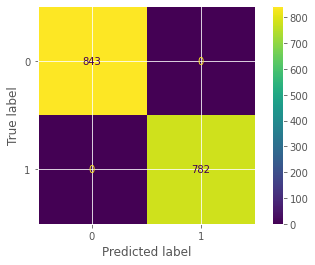

In [112]:
evaluation_parametrics("Deep Neural Network", y_val, y_pred)

Berdasarkan classification report dan confusion matrix di atas: \
1. Nilai untuk precision pada data 0 adalah  karena TN nya 843 dan FN nya 0, nilai yang sangat bagus karena dari 843 data prediksi, 843 nya data actual bernilai 0. \
2. Nilai untuk precision pada data 1 adalah 1 karena TP nya 782 dan FP nya 0, nilai yang sangat bagus karena dari 782 data prediksi, 782 nya data actual bernilai 1. \
3. Nilai untuk recall pada data 0 adalah 1 karena TN nya 843 dan FN nya 0, nilai yang sangat bagus karena dari 843 data prediksi, 843 nya data actual bernilai 0. \
4. Nilai untuk recall pada data 1 adalah 1 karena TP nya 782 dan FN nya 0, nilai yang sangat bagus karena dari 782 data prediksi, 782 nya data actual bernilai 1. \
5. f1 score untuk data 0 adalah 1 karena kombinasi dari nilai precision dan recall-nya, sudah sangat bagus karena sudah maksimal. \
6. f1 score untuk data 1 adalah 1 karena kombinasi dari nilai precision dan recall-nya, sudah sangat bagus juga karena sudah maksimal. \
7. Terakhir, untuk accuracy juga sudah sangat bagus karena sudah maksimal, yaitu 1. \

Note: TN(True Negative), TP(True Positive), FN(False Negatif), FP(False Positif). \
Sehingga dapat disimpulkan bahwa model ini sangat bagus untuk melakukan klasifikasi biner terhadap kemungkinan jamur beracun atau tidak.

##Features important

In [113]:
result = permutation_importance(model, X_val, y_val, n_repeats=10,
                                scoring='accuracy', random_state=42)

Menggunakan metode permutation importance dari sklearn untuk mencari fitur fitur yang mempengaruhi akurasi dari model dengan men-shuffle setiap fitur sebanyak 10 kali.

In [114]:
for i in result.importances_mean.argsort()[::-1]:
  print(f"{X_val.columns.values[i]:<12}"
        f"{result.importances_mean[i]:.3f}"
        f" +/- {result.importances_std[i]:.3f}")

stalk-root  0.111 +/- 0.008
spore-print-color0.049 +/- 0.004
gill-size   0.043 +/- 0.004
ring-number 0.037 +/- 0.003
odor        0.036 +/- 0.004
gill-spacing0.036 +/- 0.004
habitat     0.026 +/- 0.003
gill-color  0.017 +/- 0.003
stalk-surface-above-ring0.015 +/- 0.002
veil-color  0.010 +/- 0.002
bruises     0.008 +/- 0.001
stalk-shape 0.006 +/- 0.001
stalk-surface-below-ring0.005 +/- 0.001
cap-surface 0.003 +/- 0.001
gill-attachment0.002 +/- 0.001
stalk-color-above-ring0.001 +/- 0.001
stalk-color-below-ring0.001 +/- 0.001
ring-type   0.001 +/- 0.001
population  0.000 +/- 0.000
veil-type   0.000 +/- 0.000
cap-color   0.000 +/- 0.000
cap-shape   0.000 +/- 0.000


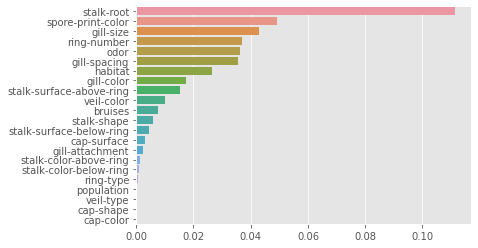

In [115]:
result_sorted = []
columns_sorted = []

for res, col in sorted(zip(result.importances_mean, X_val.columns.values), reverse=True):
  result_sorted.append(res)
  columns_sorted.append(col)

sns.barplot(result_sorted, columns_sorted)
plt.show()

Dapat dilihat, fitur-fitur yang sangat mempengaruhi akurasi dari model. Dari visualisasi tersebut, dapat disimpulka fitur fitur yang sangat berpengaruh dalam menentukan apakah jamur beracun atau tidak, yaitu: \
1. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? \
2. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y \
3. gill-size: broad=b, narrow=n \
4. ring-number: none=n, one=o, two=t \
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s \
6. gill-spacing: close=c, crowded=w, distant=d \
7. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d. \
dst.